#### Importing the important packages

In [69]:
import pandas as pd
import numpy as np
from scipy import stats
import sklearn as sk
import statsmodels.formula.api as sm
from sklearn import metrics
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

#### Setting the working directory

In [70]:
%cd C:\Users\hp\Desktop\Python\3. Network Intrusion Detection System\NSL_Dataset

C:\Users\hp\Desktop\Python\3. Network Intrusion Detection System\NSL_Dataset


#### In this case study: The data set had already been divided into the training and testing data sets, but there will be a problem if we keep it this way. 
###### Since, some of the categorical data points which are available in training set might not be present in testing data. Hence, there will be a difference in the number of variables in both the data sets.

In [71]:
Data_Train=pd.read_csv('train.txt',names=["duration","protocol_type","service","flag","src_bytes","dst_bytes","land", "wrong_fragment","urgent",
                               "hot","num_failed_logins","logged_in", "num_compromised","root_shell","su_attempted","num_root","num_file_creations",
                               "num_shells","num_access_files","num_outbound_cmds","is_host_login", "is_guest_login","count","srv_count","serror_rate",
                               "srv_serror_rate", "rerror_rate","srv_rerror_rate","same_srv_rate", "diff_srv_rate", "srv_diff_host_rate",
                               "dst_host_count","dst_host_srv_count","dst_host_same_srv_rate", "dst_host_diff_srv_rate","dst_host_same_src_port_rate",
                               "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate", "dst_host_rerror_rate",
                               "dst_host_srv_rerror_rate","attack", "last_flag"])

In [72]:
Data_Test=pd.read_csv('test.txt',names=["duration","protocol_type","service","flag","src_bytes","dst_bytes","land", "wrong_fragment","urgent",
                               "hot","num_failed_logins","logged_in", "num_compromised","root_shell","su_attempted","num_root","num_file_creations",
                               "num_shells","num_access_files","num_outbound_cmds","is_host_login", "is_guest_login","count","srv_count","serror_rate",
                               "srv_serror_rate", "rerror_rate","srv_rerror_rate","same_srv_rate", "diff_srv_rate", "srv_diff_host_rate",
                               "dst_host_count","dst_host_srv_count","dst_host_same_srv_rate", "dst_host_diff_srv_rate","dst_host_same_src_port_rate",
                               "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate", "dst_host_rerror_rate",
                               "dst_host_srv_rerror_rate","attack", "last_flag"])

##### That's why we first merge both of these data sets, do the data manipulation and then split them on our on terms while building the model

In [73]:
Master_Data=pd.concat([Data_Train,Data_Test],axis=0).reset_index(drop=True)

#### Following are the numerical variables in the given data set

In [74]:
Numeric_Variables=['duration',
 'src_bytes',
 'dst_bytes',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'num_compromised',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'num_outbound_cmds',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate']

In [75]:
Numeric_Data=Master_Data[Numeric_Variables]

#### UDF for summary of continuous variables:

In [76]:
def continuous_var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  
                      x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),
                          x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), 
                              x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index = ['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1', 
                               'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

#### Continuous Variables Summary:

In [77]:
Numeric_Data.apply(continuous_var_summary).round(2).T

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
duration,148517.0,0.0,4.110643e+07,276.78,0.00,2460.68,6.054961e+06,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,9.00,8172.00,5.771500e+04
src_bytes,148517.0,0.0,5.974534e+09,40227.95,44.00,5409611.60,2.926390e+13,0.0,0.0,0.00,0.00,0.00,44.00,278.00,884.00,1594.20,54540.00,1.379964e+09
dst_bytes,148517.0,0.0,2.537985e+09,17088.85,0.00,3703524.78,1.371610e+13,0.0,0.0,0.00,0.00,0.00,0.00,571.00,3437.40,8314.00,25598.16,1.309937e+09
wrong_fragment,148517.0,0.0,3.048000e+03,0.02,0.00,0.24,6.000000e-02,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.000000e+00
urgent,148517.0,0.0,3.000000e+01,0.00,0.00,0.02,0.000000e+00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.000000e+00
hot,148517.0,0.0,2.812600e+04,0.19,0.00,2.01,4.050000e+00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,1.010000e+02
num_failed_logins,148517.0,0.0,6.420000e+02,0.00,0.00,0.07,1.000000e-02,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.000000e+00
num_compromised,148517.0,0.0,3.788100e+04,0.26,0.00,22.23,4.942300e+02,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,7.479000e+03
num_root,148517.0,0.0,4.065300e+04,0.27,0.00,22.69,5.147900e+02,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.468000e+03
num_file_creations,148517.0,0.0,1.793000e+03,0.01,0.00,0.52,2.700000e-01,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.000000e+02


##### It is evident from the above summary that the Continuous Variables have a lot of zeros.

In [78]:
for i in Numeric_Variables:
    k=Numeric_Data[Numeric_Data[i]==0][i].count()
    print(i , 'has',(k/Numeric_Data.shape[0])*100,'%','zeros')

duration has 90.88050526202387 % zeros
src_bytes has 38.39156460203209 % zeros
dst_bytes has 52.07013338540369 % zeros
wrong_fragment has 99.19874492482343 % zeros
urgent has 99.98720685174088 % zeros
hot has 97.52351582647104 % zeros
num_failed_logins has 99.59600584444878 % zeros
num_compromised has 98.88564945427123 % zeros
num_root has 99.530693455968 % zeros
num_file_creations has 99.77847653803941 % zeros
num_shells has 99.95556064288937 % zeros
num_access_files has 99.70171764848469 % zeros
num_outbound_cmds has 100.0 % zeros
count has 0.009426530296195048 % zeros
srv_count has 0.009426530296195048 % zeros
serror_rate has 71.38778725667768 % zeros
srv_serror_rate has 72.97817758236431 % zeros
rerror_rate has 85.21852717197358 % zeros
srv_rerror_rate has 85.28518620763953 % zeros
same_srv_rate has 2.3633658099746158 % zeros
diff_srv_rate has 61.98886322777864 % zeros
srv_diff_host_rate has 77.52849842105618 % zeros
dst_host_count has 0.002693294370341442 % zeros
dst_host_srv_coun

##### The variables: Duration, Wrong_Fragment, Urgent, Hot, Num_Failed_Logins, Num_Compromised, Num_Root, Num_File_Creations, Num_Shells, Num_Access_Files, Num_Outbound_Cmds have more than 90% of their values as zeros. Since there is hardly any variablility in these vriables and keeping a variable in themodel which has only one value throughout doesn't make a lot of sense. Hence, we drop these in the initial stage only.

In [79]:
Numeric_Data_New=Numeric_Data.drop(columns={'duration','wrong_fragment','urgent','hot','num_failed_logins','num_compromised'
                                           ,'num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds'})

In [80]:
Numeric_Data_New.apply(continuous_var_summary).round(2).T

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
src_bytes,148517.0,0.0,5.974534e+09,40227.95,44.00,5409611.60,2.926390e+13,0.0,0.0,0.00,0.00,0.00,44.00,278.00,884.00,1594.20,54540.00,1.379964e+09
dst_bytes,148517.0,0.0,2.537985e+09,17088.85,0.00,3703524.78,1.371610e+13,0.0,0.0,0.00,0.00,0.00,0.00,571.00,3437.40,8314.00,25598.16,1.309937e+09
count,148517.0,0.0,1.237690e+07,83.34,13.00,116.76,1.363307e+04,0.0,1.0,1.00,1.00,2.00,13.00,141.00,256.00,288.00,511.00,5.110000e+02
srv_count,148517.0,0.0,4.195893e+06,28.25,7.00,75.37,5.680580e+03,0.0,1.0,1.00,1.00,2.00,7.00,17.00,40.00,159.00,510.00,5.110000e+02
serror_rate,148517.0,0.0,3.815768e+04,0.26,0.00,0.43,1.900000e-01,0.0,0.0,0.00,0.00,0.00,0.00,0.85,1.00,1.00,1.00,1.000000e+00
srv_serror_rate,148517.0,0.0,3.792188e+04,0.26,0.00,0.43,1.900000e-01,0.0,0.0,0.00,0.00,0.00,0.00,0.91,1.00,1.00,1.00,1.000000e+00
rerror_rate,148517.0,0.0,2.048744e+04,0.14,0.00,0.34,1.200000e-01,0.0,0.0,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.000000e+00
srv_rerror_rate,148517.0,0.0,2.056769e+04,0.14,0.00,0.34,1.200000e-01,0.0,0.0,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.000000e+00
same_srv_rate,148517.0,0.0,9.994937e+04,0.67,1.00,0.44,1.900000e-01,0.0,0.0,0.01,0.03,0.10,1.00,1.00,1.00,1.00,1.00,1.000000e+00
diff_srv_rate,148517.0,0.0,1.006373e+04,0.07,0.00,0.19,4.000000e-02,0.0,0.0,0.00,0.00,0.00,0.00,0.06,0.08,0.44,1.00,1.000000e+00


#### Checking the continuous data for outliers:

##### 1. Variable: src_bytes

In [81]:
Numeric_Data_New['src_bytes']=Numeric_Data_New['src_bytes'].clip(upper=Numeric_Data_New['src_bytes'].quantile(0.95))

##### 2. Variable: dst_bytes

In [82]:
Numeric_Data_New['dst_bytes']=Numeric_Data_New['dst_bytes'].clip(upper=Numeric_Data_New['dst_bytes'].quantile(0.95))

##### Summary for Categorical Variables:

In [84]:
Categorical_Variables=Master_Data.columns.difference(Numeric_Variables)

In [85]:
Categorical_Data=Master_Data[Categorical_Variables]

In [86]:
def categorical_var_summary(x):
    Mode = x.value_counts().sort_values(ascending = False)[0:1].reset_index()
    return pd.Series([x.count(), x.isnull().sum(), Mode.iloc[0, 0], Mode.iloc[0, 1], 
                          round(Mode.iloc[0, 1] * 100/x.count(), 2)], 
                  index = ['N', 'NMISS', 'MODE', 'FREQ', 'PERCENT'])

In [87]:
Categorical_Data.apply(categorical_var_summary).round(2).T

,N,NMISS,MODE,FREQ,PERCENT
attack,148517,0,normal,77054,51.88
flag,148517,0,SF,89820,60.48
is_guest_login,148517,0,0,146689,98.77
is_host_login,148517,0,0,148505,99.99
land,148517,0,0,148485,99.98
last_flag,148517,0,21,73251,49.32
logged_in,148517,0,0,88696,59.72
protocol_type,148517,0,tcp,121569,81.86
root_shell,148517,0,0,148293,99.85
service,148517,0,http,48191,32.45


##### The values in the variables is_guest_login, is_host_login, land, root_shell, su_attempted are 99% same, hence they are not going to help in the prediction of Y variable and hence can be dropped in initial stages only.

In [88]:
Categorical_Data_New=Categorical_Data.drop(columns={'is_guest_login','is_host_login','land','root_shell','su_attempted'})

#### Combining categorical and continuous data sets:

In [89]:
Data_Model=pd.concat([Numeric_Data_New,Categorical_Data_New],axis=1)

##### The variable attack is the Y variable, for binomial case there will be two distinct values in it "Normal" encoded as 0 and "Attack" encoded as 1.

In [90]:
Data_Model['attack_bi']=np.where(Data_Model.attack=='normal',0,1)

##### The variable attack is the Y variable, for binomial case there will be two distinct values in it "Normal" encoded as 0 and different types of attack have been encoded as 1,2,3,4.

In [91]:
Data_Model['attack_mul']=np.where(Data_Model.attack=='normal',0,np.where(((Data_Model.attack == 'back') | (Data_Model.attack == 'land')
                                                                        | (Data_Model.attack == 'neptune') | (Data_Model.attack == 'pod')
                                                                        |(Data_Model.attack == 'smurf') |(Data_Model.attack == 'teardrop')
                                                                        | (Data_Model.attack == 'apache2')|(Data_Model.attack == 'udpstorm')
                                                                        | (Data_Model.attack == 'processtable')| (Data_Model.attack == 'worm')),1,
                                                                np.where(((Data_Model.attack == 'satan') | (Data_Model.attack == 'ipsweep')
                                                                        | (Data_Model.attack == 'nmap') | (Data_Model.attack == 'portsweep')
                                                                        |(Data_Model.attack == 'mscan') |(Data_Model.attack == 'saint')),2,
                                                                np.where(((Data_Model.attack == 'guess_passwd') | (Data_Model.attack == 'ftp_write')
                                                                        | (Data_Model.attack == 'imap') | (Data_Model.attack == 'phf')
                                                                        |(Data_Model.attack == 'multihop') |(Data_Model.attack == 'warezmaster')
                                                                        | (Data_Model.attack == 'warezclient') | (Data_Model.attack == 'spy')
                                                                        | (Data_Model.attack == 'xlock') | (Data_Model.attack == 'xsnoop')
                                                                        |(Data_Model.attack == 'snmpguess') |(Data_Model.attack == 'snmpgetattack')
                                                                        | (Data_Model.attack == 'httptunnel') | (Data_Model.attack == 'sendmail')
                                                                        |(Data_Model.attack == 'named')),3,4))))

In [92]:
Flag_Freq_Rate=pd.DataFrame(Data_Model.groupby('flag')['flag'].count()/Data_Model.shape[0]).rename(columns={'flag':'Flag_Freq_Rate'}).reset_index()

In [93]:
Flag_Freq_Rate

,flag,Flag_Freq_Rate
0,OTH,0.000337
1,REJ,0.101557
2,RSTO,0.015722
3,RSTOS0,0.000707
4,RSTR,0.020806
5,S0,0.248214
6,S1,0.002599
7,S2,0.000956
8,S3,0.002007
9,SF,0.604779


##### The above table tells us that other than the values S0, SF and REJ all the remaining have very less frequency in the given data set hence we can bucket this variable into three categories:
###### 1. FLevel 1: %age less than 10% 
###### 2. FLevel2: %age between 10% and 60%
###### 3. FLevel3: %age greater than 60%

In [94]:
Data_Model=Flag_Freq_Rate.merge(Data_Model,how='left',left_on='flag',right_on='flag')

In [95]:
Data_Model.head()

,flag,Flag_Freq_Rate,src_bytes,dst_bytes,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,...,dst_host_srv_rerror_rate,src_bytes_bin,dst_bytes_bin,attack,last_flag,logged_in,protocol_type,service,attack_bi,attack_mul
0,OTH,0.000337,0.0,0,1,1,0.00,0.00,0.0,0.0,...,0.0,"(-0.001, 44.0]","(-0.001, 571.0]",portsweep,12,0,tcp,private,1,2
1,OTH,0.000337,0.0,0,1,1,0.00,0.00,0.0,0.0,...,0.0,"(-0.001, 44.0]","(-0.001, 571.0]",portsweep,1,0,tcp,smtp,1,2
2,OTH,0.000337,0.0,0,15,15,0.07,0.07,0.0,0.0,...,0.0,"(-0.001, 44.0]","(-0.001, 571.0]",normal,20,0,tcp,http,0,0
3,OTH,0.000337,0.0,0,1,1,0.00,0.00,0.0,0.0,...,0.0,"(-0.001, 44.0]","(-0.001, 571.0]",portsweep,12,0,tcp,private,1,2
4,OTH,0.000337,0.0,0,1,1,0.00,0.00,0.0,0.0,...,0.0,"(-0.001, 44.0]","(-0.001, 571.0]",portsweep,9,0,tcp,uucp_path,1,2


##### Creating levels out of Flag_Freq_Rate

In [96]:
Data_Model['flag_level']=np.where(Data_Model['Flag_Freq_Rate']<0.1,'FLevel1',np.where(Data_Model['Flag_Freq_Rate']<0.6,
                                                                                                        'FLevel2','FLevel3'))

In [97]:
Data_Model.head()

,flag,Flag_Freq_Rate,src_bytes,dst_bytes,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,...,src_bytes_bin,dst_bytes_bin,attack,last_flag,logged_in,protocol_type,service,attack_bi,attack_mul,flag_level
0,OTH,0.000337,0.0,0,1,1,0.00,0.00,0.0,0.0,...,"(-0.001, 44.0]","(-0.001, 571.0]",portsweep,12,0,tcp,private,1,2,FLevel1
1,OTH,0.000337,0.0,0,1,1,0.00,0.00,0.0,0.0,...,"(-0.001, 44.0]","(-0.001, 571.0]",portsweep,1,0,tcp,smtp,1,2,FLevel1
2,OTH,0.000337,0.0,0,15,15,0.07,0.07,0.0,0.0,...,"(-0.001, 44.0]","(-0.001, 571.0]",normal,20,0,tcp,http,0,0,FLevel1
3,OTH,0.000337,0.0,0,1,1,0.00,0.00,0.0,0.0,...,"(-0.001, 44.0]","(-0.001, 571.0]",portsweep,12,0,tcp,private,1,2,FLevel1
4,OTH,0.000337,0.0,0,1,1,0.00,0.00,0.0,0.0,...,"(-0.001, 44.0]","(-0.001, 571.0]",portsweep,9,0,tcp,uucp_path,1,2,FLevel1


In [98]:
Service_Freq_Rate=pd.DataFrame(Data_Model.groupby('service')['service'].count()/
                               Data_Model.shape[0]).rename(columns={'service':'Service_Freq_Rate'}).reset_index()

In [99]:
Service_Freq_Rate.head()

,service,Service_Freq_Rate
0,IRC,0.001347
1,X11,0.000593
2,Z39_50,0.006107
3,aol,0.000013
4,auth,0.006881


##### The above table tells us that other than the values http and private all the remaining have very less frequency in the given data set hence we can bucket this variable into three categories:
###### 1. SLevel 1: %age less than 10% 
###### 2. SLevel2: %age between 10% and 30%
###### 3. SLevel3: %age greater than 30%

In [100]:
Data_Model=Service_Freq_Rate.merge(Data_Model,how='left',left_on='service',right_on='service')

In [101]:
Data_Model.head()

,service,Service_Freq_Rate,flag,Flag_Freq_Rate,src_bytes,dst_bytes,count,srv_count,serror_rate,srv_serror_rate,...,dst_host_srv_rerror_rate,src_bytes_bin,dst_bytes_bin,attack,last_flag,logged_in,protocol_type,attack_bi,attack_mul,flag_level
0,IRC,0.001347,REJ,0.101557,0.0,0,2,1,0.00,0.0,...,0.67,"(-0.001, 44.0]","(-0.001, 571.0]",normal,15,0,tcp,0,0,FLevel2
1,IRC,0.001347,REJ,0.101557,0.0,0,511,1,0.07,0.0,...,1.00,"(-0.001, 44.0]","(-0.001, 571.0]",satan,14,0,tcp,1,2,FLevel2
2,IRC,0.001347,REJ,0.101557,0.0,0,510,1,0.04,0.0,...,1.00,"(-0.001, 44.0]","(-0.001, 571.0]",saint,14,0,tcp,1,2,FLevel2
3,IRC,0.001347,REJ,0.101557,0.0,0,477,1,0.05,0.0,...,1.00,"(-0.001, 44.0]","(-0.001, 571.0]",satan,14,0,tcp,1,2,FLevel2
4,IRC,0.001347,RSTO,0.015722,1441.0,5626,1,1,0.00,0.0,...,1.00,"(278.0, 1594.2]","(571.0, 8314.0]",normal,18,1,tcp,0,0,FLevel1


##### Creating levels out of Service_Freq_Rate

In [102]:
Data_Model['service_level']=np.where(Data_Model['Service_Freq_Rate']<0.1,'SLevel1',np.where(Data_Model['Service_Freq_Rate']<0.3,
                                                                                                        'SLevel2','SLevel3'))

In [103]:
Data_Model.head()

,service,Service_Freq_Rate,flag,Flag_Freq_Rate,src_bytes,dst_bytes,count,srv_count,serror_rate,srv_serror_rate,...,src_bytes_bin,dst_bytes_bin,attack,last_flag,logged_in,protocol_type,attack_bi,attack_mul,flag_level,service_level
0,IRC,0.001347,REJ,0.101557,0.0,0,2,1,0.00,0.0,...,"(-0.001, 44.0]","(-0.001, 571.0]",normal,15,0,tcp,0,0,FLevel2,SLevel1
1,IRC,0.001347,REJ,0.101557,0.0,0,511,1,0.07,0.0,...,"(-0.001, 44.0]","(-0.001, 571.0]",satan,14,0,tcp,1,2,FLevel2,SLevel1
2,IRC,0.001347,REJ,0.101557,0.0,0,510,1,0.04,0.0,...,"(-0.001, 44.0]","(-0.001, 571.0]",saint,14,0,tcp,1,2,FLevel2,SLevel1
3,IRC,0.001347,REJ,0.101557,0.0,0,477,1,0.05,0.0,...,"(-0.001, 44.0]","(-0.001, 571.0]",satan,14,0,tcp,1,2,FLevel2,SLevel1
4,IRC,0.001347,RSTO,0.015722,1441.0,5626,1,1,0.00,0.0,...,"(278.0, 1594.2]","(571.0, 8314.0]",normal,18,1,tcp,0,0,FLevel1,SLevel1


In [104]:
last_flag_Freq_Rate=pd.DataFrame(Data_Model.groupby('last_flag')['last_flag'].count()/
                               Data_Model.shape[0]).rename(columns={'last_flag':'last_flag_Freq_Rate'}).reset_index()

In [105]:
last_flag_Freq_Rate

,last_flag,last_flag_Freq_Rate
0,0,0.001273
1,1,0.001003
2,2,0.000734
3,3,0.001219
4,4,0.001212
5,5,0.001239
6,6,0.001704
7,7,0.002471
8,8,0.001596
9,9,0.002020


##### The above table tells us that other than the values 21, 20 and 18 all the remaining have very less frequency in the given data set hence we can bucket this variable into three categories:
###### 1. LFLevel 1: %age less than 10% 
###### 2. LFLevel2: %age between 10% and 30%
###### 3. LFLevel3: %age greater than 30%

In [106]:
Data_Model=last_flag_Freq_Rate.merge(Data_Model,how='left',left_on='last_flag',right_on='last_flag')

In [107]:
Data_Model.head()

,last_flag,last_flag_Freq_Rate,service,Service_Freq_Rate,flag,Flag_Freq_Rate,src_bytes,dst_bytes,count,srv_count,...,dst_host_srv_rerror_rate,src_bytes_bin,dst_bytes_bin,attack,logged_in,protocol_type,attack_bi,attack_mul,flag_level,service_level
0,0,0.001273,IRC,0.001347,SF,0.604779,342.0,1011,1,1,...,0.76,"(278.0, 1594.2]","(571.0, 8314.0]",xlock,0,tcp,1,3,FLevel3,SLevel1
1,0,0.001273,X11,0.000593,SF,0.604779,1360.0,8314,1,1,...,0.00,"(278.0, 1594.2]","(571.0, 8314.0]",xsnoop,0,tcp,1,3,FLevel3,SLevel1
2,0,0.001273,auth,0.006881,SF,0.604779,10.0,35,1,1,...,0.00,"(-0.001, 44.0]","(-0.001, 571.0]",satan,1,tcp,1,2,FLevel3,SLevel1
3,0,0.001273,auth,0.006881,SF,0.604779,10.0,35,2,1,...,0.00,"(-0.001, 44.0]","(-0.001, 571.0]",satan,0,tcp,1,2,FLevel3,SLevel1
4,0,0.001273,auth,0.006881,SF,0.604779,10.0,35,1,1,...,0.00,"(-0.001, 44.0]","(-0.001, 571.0]",satan,1,tcp,1,2,FLevel3,SLevel1


##### Creating levels out of last_flag_Freq_Rate

In [108]:
Data_Model['last_flag_level']=np.where(Data_Model['last_flag_Freq_Rate']<0.1,'LFLevel1',np.where(Data_Model['last_flag_Freq_Rate']<0.3,
                                                                                                        'LFLevel2','LFLevel3'))

In [110]:
Data_Model.head()

,last_flag,last_flag_Freq_Rate,service,Service_Freq_Rate,flag,Flag_Freq_Rate,src_bytes,dst_bytes,count,srv_count,...,src_bytes_bin,dst_bytes_bin,attack,logged_in,protocol_type,attack_bi,attack_mul,flag_level,service_level,last_flag_level
0,0,0.001273,IRC,0.001347,SF,0.604779,342.0,1011,1,1,...,"(278.0, 1594.2]","(571.0, 8314.0]",xlock,0,tcp,1,3,FLevel3,SLevel1,LFLevel1
1,0,0.001273,X11,0.000593,SF,0.604779,1360.0,8314,1,1,...,"(278.0, 1594.2]","(571.0, 8314.0]",xsnoop,0,tcp,1,3,FLevel3,SLevel1,LFLevel1
2,0,0.001273,auth,0.006881,SF,0.604779,10.0,35,1,1,...,"(-0.001, 44.0]","(-0.001, 571.0]",satan,1,tcp,1,2,FLevel3,SLevel1,LFLevel1
3,0,0.001273,auth,0.006881,SF,0.604779,10.0,35,2,1,...,"(-0.001, 44.0]","(-0.001, 571.0]",satan,0,tcp,1,2,FLevel3,SLevel1,LFLevel1
4,0,0.001273,auth,0.006881,SF,0.604779,10.0,35,1,1,...,"(-0.001, 44.0]","(-0.001, 571.0]",satan,1,tcp,1,2,FLevel3,SLevel1,LFLevel1


##### Since variables last_flag, last_flag_Freq_Rate, service, Service_Freq_Rate, flag, Flag_Freq_Rate, attack have all been transformed, we can drop these variables

In [113]:
Data_Model=Data_Model.drop(columns={'last_flag', 'last_flag_Freq_Rate', 'service', 'Service_Freq_Rate', 'flag', 'Flag_Freq_Rate', 'attack'})

In [116]:
Data_Model.shape

(148517, 34)

#### Creating the dummy variables:

In [115]:
for var in ['flag_level','service_level','last_flag_level','protocol_type']:
    Dummyvar=pd.get_dummies(Data_Model[var],prefix=var,drop_first=True)
    Data_Model=pd.concat([Data_Model,Dummyvar],axis=1)
    Data_Model=Data_Model.drop(columns={var})

#### Bi-Variate Analysis of each categorical variable with Y i.e attack_bi

In [117]:
ch_2_results=pd.DataFrame()
for i in [ 'flag_level_FLevel2',
 'flag_level_FLevel3',
 'service_level_SLevel2',
 'service_level_SLevel3',
 'last_flag_level_LFLevel2',
 'last_flag_level_LFLevel3',
 'protocol_type_tcp',
 'protocol_type_udp','logged_in']:
    A=stats.chi2_contingency(pd.crosstab(Data_Model[i],Data_Model['attack_bi']))
    temp=pd.DataFrame([i,A[1]]).T
    temp.columns=['var','pvalue']
    ch_2_results=pd.concat([ch_2_results,temp],axis=0)

In [118]:
ch_2_results

,var,pvalue
0,flag_level_FLevel2,0
0,flag_level_FLevel3,0
0,service_level_SLevel2,0
0,service_level_SLevel3,0
0,last_flag_level_LFLevel2,0
0,last_flag_level_LFLevel3,0
0,protocol_type_tcp,5.70698e-107
0,protocol_type_udp,0
0,logged_in,0


##### Splitting the data into training and testing data sets

In [119]:
train,test=train_test_split(Data_Model,test_size=0.3,random_state=42)

### Initial Model with almost every variable

In [120]:
model=sm.logit(formula= '''
 attack_bi~
src_bytes+
 dst_bytes+
 count+
 srv_count+
 serror_rate+
 srv_serror_rate+
 rerror_rate+
 srv_rerror_rate+
 same_srv_rate+
 diff_srv_rate+
 srv_diff_host_rate+
 dst_host_count+
 dst_host_srv_count+
 dst_host_same_srv_rate+
 dst_host_diff_srv_rate+
 dst_host_same_src_port_rate+
 dst_host_srv_diff_host_rate+
 dst_host_serror_rate+
 dst_host_srv_serror_rate+
 dst_host_rerror_rate+
 dst_host_srv_rerror_rate+
 logged_in+
 protocol_type_tcp+
 protocol_type_udp+
flag_level_FLevel2+
 flag_level_FLevel3+
 service_level_SLevel2+
 service_level_SLevel3+
 last_flag_level_LFLevel2+
 last_flag_level_LFLevel3
''',data=train).fit()

Optimization terminated successfully.
         Current function value: 0.112343
         Iterations 10


In [121]:
print(model.summary2())

                               Results: Logit
Model:                   Logit               Pseudo R-squared:    0.838     
Dependent Variable:      attack_bi           AIC:                 23420.5977
Date:                    2019-10-28 13:23    BIC:                 23716.7026
No. Observations:        103961              Log-Likelihood:      -11679.   
Df Model:                30                  LL-Null:             -71980.   
Df Residuals:            103930              LLR p-value:         0.0000    
Converged:               1.0000              Scale:               1.0000    
No. Iterations:          10.0000                                            
----------------------------------------------------------------------------
                             Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------------
Intercept                   -0.7681   0.2194  -3.5009 0.0005 -1.1982 -0.3381
src_bytes                    0

##### Checking the Somers' D between each x variable and y. Here, we will be fitting a logistic regression equation between y and each x. Our aim is to check whether a given x has some ordinal association with y or not where 1 signifies absolute association and -1 signifies no association. 

In [124]:
SomersD=pd.DataFrame()
for i in Data_Model.columns.difference(['attack_bi','attack_mul']):
    mod_temp=sm.logit(formula=str('attack_bi ~')+ str(i),data=Data_Model).fit()
    som_d=2*metrics.roc_auc_score(Data_Model['attack_bi'],mod_temp.predict())-1
    tempo=pd.DataFrame([i,som_d]).T
    tempo.columns=['Var','Som_D']
    SomersD=pd.concat([SomersD,tempo],axis=0)

Optimization terminated successfully.
         Current function value: 0.516230
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.664631
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.597674
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.556583
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.618243
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.656695
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.643208
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.689113
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.446227
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.479450
  

In [125]:
SomersD.sort_values(by='Som_D',ascending=False)

,Var,Som_D
0,dst_bytes,0.78276
0,src_bytes,0.762831
0,src_bytes_bin,0.761413
0,dst_host_srv_count,0.760173
0,flag_level_FLevel3,0.712021
0,dst_host_same_srv_rate,0.711397
0,same_srv_rate,0.696737
0,logged_in,0.651907
0,dst_host_diff_srv_rate,0.647118
0,diff_srv_rate,0.646419


##### We have taken the permissible limit to be 20%, i.e. the variables which have somers'd below this threshold can be dropped from the model.

In [126]:
model1=sm.logit(formula= '''
 attack_bi~
src_bytes+
 dst_bytes+
 count+
 serror_rate+
 srv_serror_rate+
 rerror_rate+
 srv_rerror_rate+
 same_srv_rate+
 diff_srv_rate+
 srv_diff_host_rate+
 dst_host_count+
 dst_host_srv_count+
 dst_host_same_srv_rate+
 dst_host_diff_srv_rate+
 dst_host_serror_rate+
 dst_host_srv_serror_rate+
 dst_host_rerror_rate+
 dst_host_srv_rerror_rate+
 logged_in+
 flag_level_FLevel2+
 flag_level_FLevel3+
 service_level_SLevel2+
 service_level_SLevel3+
 last_flag_level_LFLevel2+
 last_flag_level_LFLevel3
''',data=train).fit()

Optimization terminated successfully.
         Current function value: 0.148815
         Iterations 10


In [127]:
print(model1.summary2())

                             Results: Logit
Model:                  Logit              Pseudo R-squared:   0.785     
Dependent Variable:     attack_bi          AIC:                30993.9072
Date:                   2019-10-28 13:24   BIC:                31242.2533
No. Observations:       103961             Log-Likelihood:     -15471.   
Df Model:               25                 LL-Null:            -71980.   
Df Residuals:           103935             LLR p-value:        0.0000    
Converged:              1.0000             Scale:              1.0000    
No. Iterations:         10.0000                                          
-------------------------------------------------------------------------
                          Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------------
Intercept                -0.1254   0.1975  -0.6350 0.5254 -0.5124  0.2616
src_bytes                 0.0009   0.0000  25.7620 0.0000  0.0008  0

In [128]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

#### Now, we shall check the model for multicolinerity among the continuous variables using the correlation matrix and VIF.

In [129]:
Numeric_Data_New.corr().to_excel('corr.xlsx')

In [130]:
model1params='''
 attack_bi~
 src_bytes+
 dst_bytes+
 count+
 rerror_rate+
 diff_srv_rate+
 srv_diff_host_rate+
 dst_host_count+
 dst_host_same_srv_rate+
 dst_host_diff_srv_rate+
 logged_in+
 flag_level_FLevel2+
 service_level_SLevel2+
 service_level_SLevel3+
 last_flag_level_LFLevel2+
 last_flag_level_LFLevel3
'''

In [131]:
y,X=dmatrices(model1params,data=train,return_type='dataframe')
vif=pd.DataFrame()
vif['Variable']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

In [132]:
vif

,Variable,VIF
0,Intercept,26.386206
1,src_bytes,1.685397
2,dst_bytes,1.579319
3,count,1.809162
4,rerror_rate,1.327790
5,diff_srv_rate,1.468392
6,srv_diff_host_rate,1.270652
7,dst_host_count,1.566824
8,dst_host_same_srv_rate,4.304500
9,dst_host_diff_srv_rate,1.800807


#### The variables which have been dropped because of multicolinearity have been explained in the attached excel sheet.

In [133]:
model2=sm.logit(formula= model1params,data=train).fit()

Optimization terminated successfully.
         Current function value: 0.186581
         Iterations 9


In [134]:
print(model2.summary2())

                              Results: Logit
Model:                 Logit               Pseudo R-squared:    0.731     
Dependent Variable:    attack_bi           AIC:                 38826.2951
Date:                  2019-10-28 13:25    BIC:                 38979.1234
No. Observations:      103961              Log-Likelihood:      -19397.   
Df Model:              15                  LL-Null:             -71980.   
Df Residuals:          103945              LLR p-value:         0.0000    
Converged:             1.0000              Scale:               1.0000    
No. Iterations:        9.0000                                             
--------------------------------------------------------------------------
                          Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------------
Intercept                 0.7811   0.0595   13.1301 0.0000  0.6645  0.8977
src_bytes                 0.0006   0.0000   18.3220 0.0

#### Predicting the probabilities for training and testing data sets.

In [135]:
train['pred_prob']=model1.predict(train)
test['pred_prob']=model1.predict(test)

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [136]:
train_temp=train.copy()

##### Calculating the cut-off probability to declare any case as an Attack.

In [137]:
Roc_DF=pd.DataFrame()
for cutoff in np.linspace(0,1,100):
    train_temp['cutoff']=cutoff
    train_temp['predicted']=train['pred_prob'].apply(lambda x: 0.0 if x<cutoff else 1.0)
    TP=np.where(((train_temp['attack_bi']==1)&(train_temp['predicted']==1)),1,0).sum()
    FP=np.where(((train_temp['attack_bi']==0)&(train_temp['predicted']==1)),1,0).sum()
    TN=np.where(((train_temp['attack_bi']==0)&(train_temp['predicted']==0)),1,0).sum()
    FN=np.where(((train_temp['attack_bi']==1)&(train_temp['predicted']==0)),1,0).sum()
    Accuracy=(TP+TN)/(TP+TN+FP+FN)
    Sensitivity=TP/(TP+FN)
    Specificity=TN/(FP+TN)
    Total=Sensitivity+Specificity
    ROC_Curve=pd.DataFrame([cutoff,Accuracy,Sensitivity,Specificity,Total]).T
    ROC_Curve.columns=['cutoff','Accuracy','Sensitivity','Specificity','Total']
    Roc_DF=pd.concat([Roc_DF,ROC_Curve],axis=0)

In [138]:
Roc_DF[Roc_DF.Total==Roc_DF.Total.max()]

,cutoff,Accuracy,Sensitivity,Specificity,Total
0,0.30303,0.943998,0.97627,0.914169,1.890439


##### At the above cutoff, the sum of Sensitivity and Specificity is maximum. Hence, any value of probability above 0.30303 is considered as an attack.

In [139]:
train['Predicted']=train.pred_prob.apply(lambda x: 0.0 if x<0.30303 else 1.0)
test['Predicted']=test.pred_prob.apply(lambda x: 0.0 if x<0.30303 else 1.0)

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


#### Confusion Matrix for testing data set.

In [140]:
pd.crosstab(test['attack_bi'],test['Predicted'])

Predicted,0.0,1.0
attack_bi,,
0,21105,1924
1,537,20990


#### Accuracy of Model

In [141]:
metrics.accuracy_score(test['attack_bi'],test['Predicted'])

0.9447661369961396

#### ROC Curve

In [142]:
Roc_DF['FPR']=1-Roc_DF['Specificity']

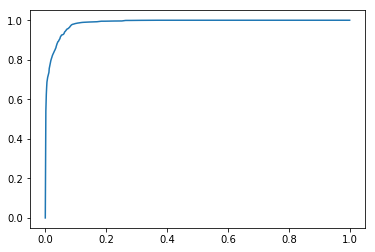

In [143]:
plt.plot(Roc_DF['FPR'],Roc_DF['Sensitivity'])

In [144]:
metrics.roc_auc_score(test['attack_bi'],test['pred_prob'])

0.9864471085648232

#### Decile Analysis for the training data.

In [145]:
train['Deciles']=pd.qcut(train['pred_prob'],10,labels=False)

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [146]:
no_1s=train[['Deciles','attack_bi']].groupby('Deciles').sum().sort_index(ascending=False)['attack_bi']
no_total=train[['Deciles','attack_bi']].groupby('Deciles').count().sort_index(ascending=False)['attack_bi']
Max_Prob=train[['Deciles','pred_prob']].groupby('Deciles').max().sort_index(ascending=False)['pred_prob']
Min_Prob=train[['Deciles','pred_prob']].groupby('Deciles').min().sort_index(ascending=False)['pred_prob']
train_Deciles=pd.concat([Max_Prob,Min_Prob,no_1s,no_total-no_1s,no_total],axis=1)
train_Deciles.columns=['Max','Min','#1','#0','Total']
train_Deciles

,Max,Min,#1,#0,Total
Deciles,,,,,
9,0.999997,0.999060,10381,15,10396
8,0.999060,0.994430,10345,51,10396
7,0.994430,0.980278,10284,112,10396
6,0.980271,0.864858,9424,969,10393
5,0.864790,0.390770,7451,2948,10399
4,0.390742,0.070595,1859,8537,10396
3,0.070581,0.005399,192,10204,10396
2,0.005399,0.001078,0,10396,10396
1,0.001078,0.000471,0,10396,10396


#### Decile Analysis for the testing data.

In [147]:
test['Deciles']=pd.qcut(test['pred_prob'],10,labels=False)

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [148]:
no_1s=test[['Deciles','attack_bi']].groupby('Deciles').sum().sort_index(ascending=False)['attack_bi']
no_total=test[['Deciles','attack_bi']].groupby('Deciles').count().sort_index(ascending=False)['attack_bi']
Max_Prob=test[['Deciles','pred_prob']].groupby('Deciles').max().sort_index(ascending=False)['pred_prob']
Min_Prob=test[['Deciles','pred_prob']].groupby('Deciles').min().sort_index(ascending=False)['pred_prob']
test_Deciles=pd.concat([Max_Prob,Min_Prob,no_1s,no_total-no_1s,no_total],axis=1)
test_Deciles.columns=['Max','Min','#1','#0','Total']
test_Deciles

,Max,Min,#1,#0,Total
Deciles,,,,,
9,0.999993,0.999067,4449,7,4456
8,0.999066,0.994435,4427,28,4455
7,0.994433,0.980841,4424,32,4456
6,0.980841,0.873545,4045,410,4455
5,0.873544,0.404865,3270,1186,4456
4,0.404824,0.076645,819,3636,4455
3,0.076569,0.005299,93,4363,4456
2,0.005292,0.001083,0,4455,4455
1,0.001083,0.000463,0,4456,4456


## Multinomial Case:

### We will be using the Random forest approach for the multinomial case.

In [152]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

##### Transforming the training and testing datasets to satify sci-kit learn requirements.

In [156]:
train,test=train_test_split(Data_Model,test_size=0.3,random_state=42)

In [158]:
features=train.columns.difference(['attack_bi','attack_mul','src_bytes_bin','dst_bytes_bin'])

#### creating the x and y matrices for the model input.

In [159]:
train_x=train[features]
train_y=train['attack_mul']
test_x=test[features]
test_y=test['attack_mul']

In [168]:
param_grid={'n_estimators':[70,80],'max_features':[10,15,20,25,30]}

In [169]:
rndmcv=GridSearchCV(RandomForestClassifier(),param_grid=param_grid,cv=5,n_jobs=-1,verbose=True)

In [170]:
model1=rndmcv.fit(train_x,train_y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  6.2min finished


##### Following are the parameters which will be used for final model.

In [171]:
model1.best_params_

{'max_features': 15, 'n_estimators': 70}

#### Final Model

In [172]:
rndmclf=RandomForestClassifier(n_estimators=70,max_features=15,oob_score=True,n_jobs=-1)
rndmclf.fit(train_x,train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=15, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=70, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [173]:
feature_importance=rndmclf.feature_importances_

In [174]:
indices=np.argsort(rndmclf.feature_importances_)[::-1]

In [175]:
feature_rank=pd.DataFrame(columns=['rank','feature','importance'])
for i in range(train_x.shape[1]):
    feature_rank.loc[i]=[i+1,train_x.columns[indices[i]],feature_importance[indices[i]]]

#### feature importance dataframe

In [176]:
feature_rank

,rank,feature,importance
0,1,src_bytes,0.353602
1,2,same_srv_rate,0.124017
2,3,count,0.079035
3,4,diff_srv_rate,0.052972
4,5,last_flag_level_LFLevel3,0.046772
5,6,dst_host_same_src_port_rate,0.044655
6,7,dst_host_diff_srv_rate,0.042361
7,8,flag_level_FLevel3,0.035627
8,9,dst_bytes,0.034738
9,10,srv_count,0.024811


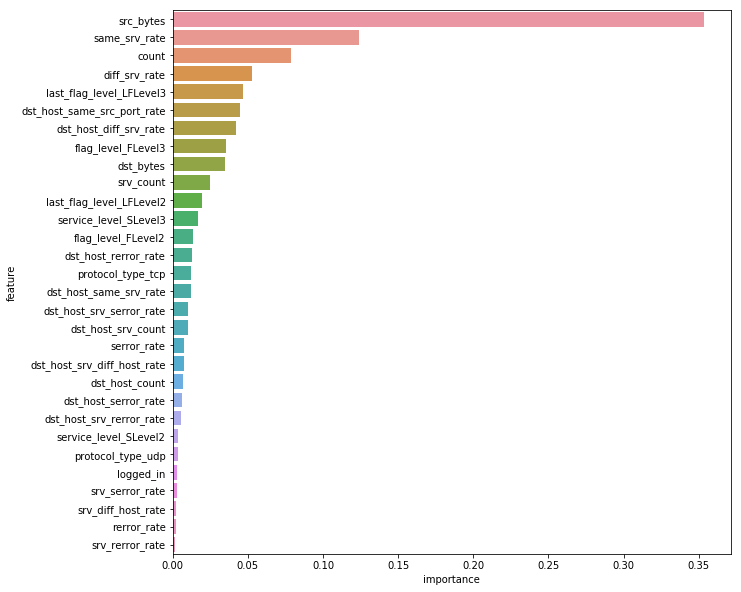

In [181]:
plt.figure(figsize=(10,10))
sns.barplot(x='importance',y='feature',data=feature_rank)

#### Model Accuracy

In [182]:
metrics.accuracy_score(test_y,rndmclf.predict(test_x))

0.995937696382081

##### Confusion Matrix

In [183]:
test['predicted']=rndmclf.predict(test_x)

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [184]:
pd.crosstab(test_y,test['predicted'])

predicted,0,1,2,3,4
attack_mul,,,,,
0,22954,15,24,32,4
1,12,16058,1,0,0
2,12,1,4147,1,0
3,53,0,0,1128,0
4,18,0,0,8,88
